# Grover's Oracle

The Grover's algorithm is used to serach through an unsorted search space of N elements, and it provides a quadratic speedup over its classical counter parts, the search can be done in O($\sqrt2$) time. Today, we will investigate the Grover's algorithm. 

The formal problem statement of the search problem can be summarized as follows, 
Suppose we have a search space N = $2^n$, so the index of each element can be stored in n bits. Suppose we have a function f which takes integer input x, such that f(x) = 1 if x is a solutio to the serach problem, and f(x) = 0 if x is not a solution to the search problem. How exactly does this happen? This can be broken down into the following steps. 

1. Apply the Hadamard transformation on qubits for the first time
2. Apply the oracle O
3. Apply the Hadamard transformation on qubits for the second time
4. Performing a conditional phase shift on the computer
5. Apply the Hadamard transformation
6. Measurements


### Two qubit Circuit

In [105]:
from qiskit import *
import matplotlib.pyplot as plot
from numpy import * 
from qiskit.visualization import plot_histogram
from qiskit.quantum_info.operators import Operator
sim = Aer.get_backend('aer_simulator')

In [106]:
### Defining the oracle and creating a gate
oracle = QuantumCircuit(2, name='oracle')

c = Operator([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, -1, 0],
    [0, 0, 0, 1]
])
oracle.unitary(c, [0, 1], label='oracle')

#oracle.cz(0,1)
oracle.to_gate()
oracle.draw()

┌─────────┐
q_0: ┤0        ├
     │  oracle │
q_1: ┤1        ├
     └─────────┘

What this gate looks like in the matrix is as follows

$$Y = \begin{bmatrix} 1 & 0 & 0 & 0\\ 0 & 1 & 0 & 0\\ 0 & 0 & 1 & 0\\ 0 & 0 & 0 & -1 \end{bmatrix}$$

What do you notice about this matrix? 

In [107]:
### Completing step 1 and 2
# We want to first apply the H gates to all qubits
cq = QuantumCircuit(2,2)
cq.h([0,1])
cq.append(oracle, [0,1])
cq.draw()

┌───┐┌─────────┐
q_0: ┤ H ├┤0        ├
     ├───┤│  oracle │
q_1: ┤ H ├┤1        ├
     └───┘└─────────┘
c: 2/════════════════

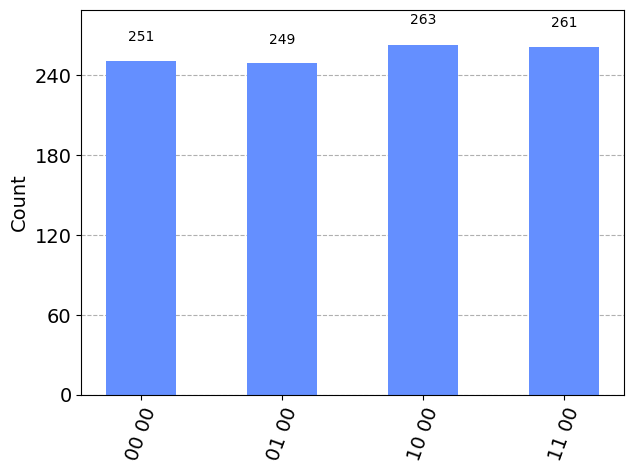

In [108]:
### Let's check the results
cq.measure_all()
qoj = transpile(cq,sim)
counts = sim.run(qoj).result().get_counts()
plot_histogram(counts)

In [109]:
### Diffuser (Step 3 to 5)
diffuser = QuantumCircuit(2, name="diffuser")
diffuser.h([0,1])
diffuser.z([0,1])
diffuser.cz(0,1)
diffuser.h([0,1])
diffuser.to_gate()
diffuser.draw()

┌───┐┌───┐   ┌───┐
q_0: ┤ H ├┤ Z ├─■─┤ H ├
     ├───┤├───┤ │ ├───┤
q_1: ┤ H ├┤ Z ├─■─┤ H ├
     └───┘└───┘   └───┘

In [110]:
### Putting everything together and final measurement
final_cq = QuantumCircuit(2,2)
final_cq.h([0,1])
final_cq.append(oracle,[0,1])
final_cq.append(diffuser,[0,1])

final_cq.measure_all()

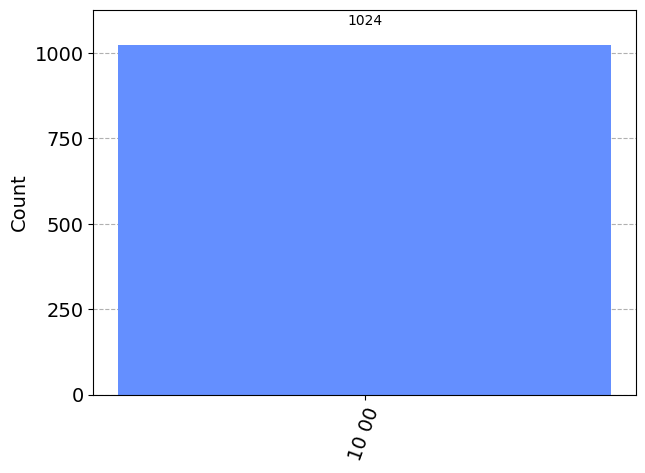

In [111]:
qoj = transpile(final_cq,sim)
counts = sim.run(qoj).result().get_counts()
plot_histogram(counts)

### Practice

Now that we have walked through how the circuit is built for a 2-qubit case. Can you try making the oracle for a 3-qubit and 4-qubit case? For example, an oracle that identifies the 111, an oracle that identifies the 1011. 